# Parameter inference for a distribution within the Bayesian Framework


In [1]:
# Didactical script for Bayesian inference of parameters
# O. Wani (Mar, 2021)
# Metropolis-Hastings algorithm:
# adapted from fJoseph Moukarzel (Towards data science: https://tinyurl.com/yxaqdjv2)

import matplotlib.pyplot as plt # package for good plots
import pandas as pd             # package for data analytics
import numpy as np              # package for efficient numerics
import plotly.offline as py     # for dynamic plots
import cufflinks as cf          # plotly bindings for pandas
import seaborn as sns           # for nice plots
import scipy.stats as stats     # fit a GEV distribution

from ipynb.fs.full.import_data import get_data, get_station_name # Import data

# other modules that can be employed for inference
#import emcee
#import mc3
#import sys
#from pydream.parameters import FlatParam
#from pydream.core import run_dream
#from pydream.convergence import  Gelman_Rubin

In [12]:
# test hypothesis on GEV
samp1e1 = stats.genextreme.rvs( size=1000, c = 0,  loc=10, scale=1)
samp1e2 = stats.genextreme.rvs( size=1000, c = 0,  loc=10, scale=1)
samp1e3 = stats.genextreme.rvs( size=1000, c = 0,  loc=102, scale=1) 
sta = np.append(samp1e1 ,samp1e2)
non_sta = np.append(samp1e1 ,samp1e3)
# use scipy.stats to get the 'best guess' values of parameters

In [13]:
shape1, loc1, scale1 =stats.genextreme.fit(sample1)
print(shape1, loc1, scale1)

NameError: name 'sample1' is not defined

In [14]:
# import data (change the adress to the folder AMS )
HJ_precip = get_data(4,['Precipitation'])#.loc['2005-1-1':'2015-1-1'])
HJ_sm = get_data(4,['SoilMoisture'])
HJ_temp = get_data(4,['SoilTemperature'])

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [15]:
HJ_sm.loc['2000-1-1':'2015-1-1']

,CENMET_SoilMoisture_10cm,CENMET_SoilMoisture_20cm,CENMET_SoilMoisture_50cm,CENMET_SoilMoisture_100cm,PRIMET_SoilMoisture_10cm,PRIMET_SoilMoisture_20cm,PRIMET_SoilMoisture_50cm,PRIMET_SoilMoisture_100cm,UPLMET_SoilMoisture_10cm,UPLMET_SoilMoisture_20cm,UPLMET_SoilMoisture_50cm,UPLMET_SoilMoisture_100cm,VANMET_SoilMoisture_10cm,VANMET_SoilMoisture_20cm,VANMET_SoilMoisture_50cm,VANMET_SoilMoisture_100cm
DateTime,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,23.0,20.0,21.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,28.0,25.0,26.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,28.0,25.0,27.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,29.0,26.0,28.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,28.0,26.0,57.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-28,13.0,17.0,25.0,23.0,28.0,25.0,26.0,32.0,41.0,29.0,46.563111,61.0,29.0,32.0,45.0,83.0
2014-12-29,13.0,17.0,25.0,23.0,28.0,25.0,26.0,62.0,40.0,29.0,46.563111,61.0,29.0,32.0,43.0,80.0
2014-12-30,13.0,17.0,25.0,23.0,24.0,23.0,26.0,67.0,40.0,28.0,44.919323,59.0,29.0,32.0,42.0,75.0


<AxesSubplot:title={'center':'Maximum annual prcipitation'}, ylabel='Frequency'>

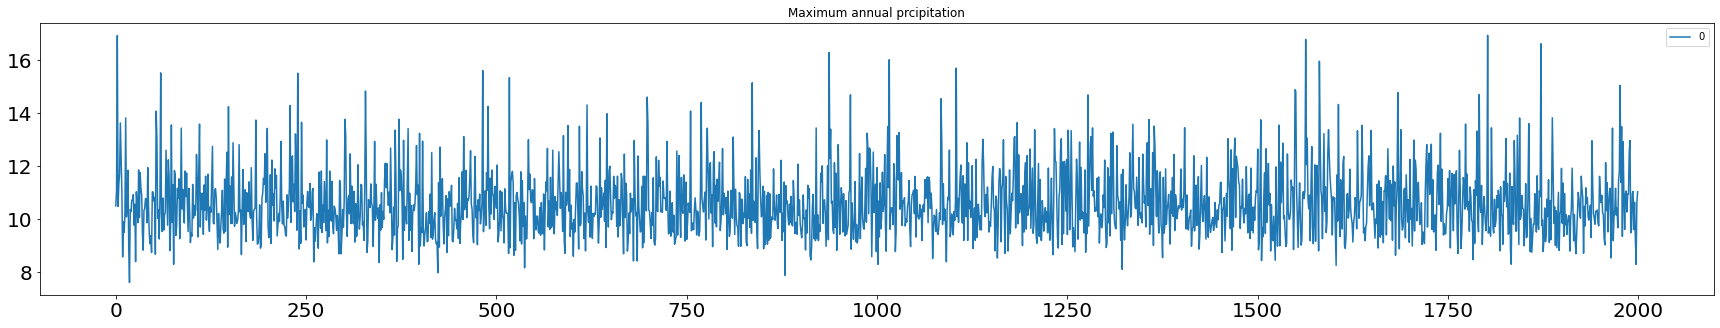

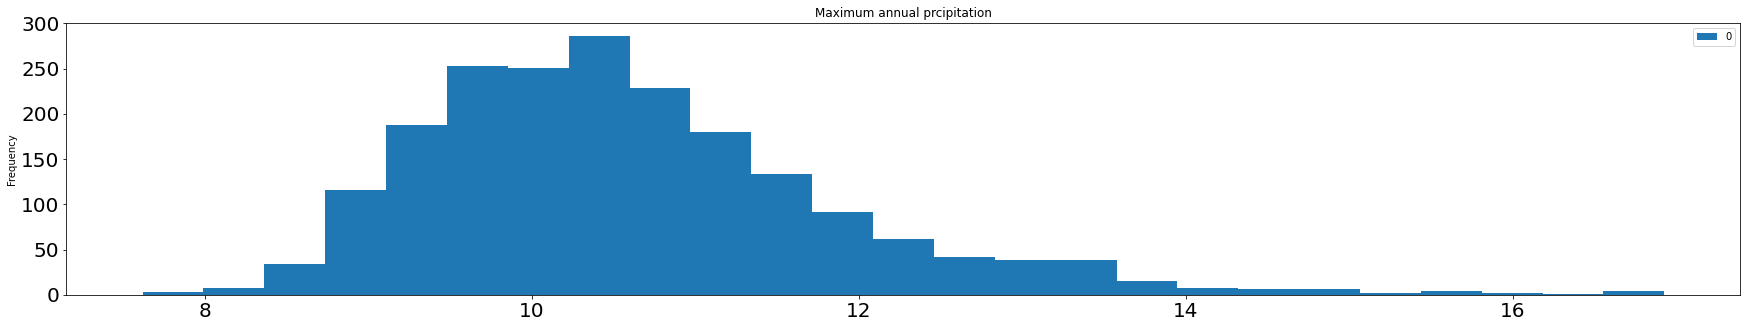

In [16]:
pd.DataFrame(sta).plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')
pd.DataFrame(sta).plot(kind='hist', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation', bins=25)

In [17]:
# use scipy.stats to get the 'best guess' values of parameters
shape1, loc1, scale1 =stats.genextreme.fit(datin.dat1)
print(shape1, loc1, scale1)

NameError: name 'datin' is not defined

In [123]:
# write the code for inference using the Bayesian 'machinery'

#define prior
def log_prior(par):
    par = par[1:3]
    if(all(i >= -10 for i in par)):
        return 0
    else:
        return -np.inf

#define likelihood function

def log_lik_gev(par,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(stats.genextreme(par[0],par[1],par[2]).pdf([data])))

#define posterior
def log_post(par, data):
    if (log_prior(par)==-np.inf):
        lp = log_prior(par)
    else: 
        lp = log_lik_gev(par,data)
    return lp    


In [124]:

log_prior((-0.1,-0.1,-0.1))

0

In [125]:
# check whether the functions work
a = log_lik_gev((-0.1,0.1,0.1), sta)
b = log_post((-0.1,-0.1,0.1), sta)
a, b

(-49036.64579782878, -49419.59564951259)

In [191]:
np.multiply([1,2,3],[2,2,2])

array([2, 4, 6])

In [192]:
#Define jumpt distribution or the transition model

transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),np.ones(len(x)))

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))

# Define the MCMC algorithm
    
def metropolis_hastings(likelihood_computer, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        
        if (acceptance_rule(x_lik,x_new_lik)):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
            accepted.append(x)
                
    return np.array(accepted), np.array(rejected)

In [131]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1), iterations = 15000, data = np.array(samp1e1), acceptance_rule = acceptance)


<ipython-input-123-dd2dc8ea979c>:16: RuntimeWarning:

divide by zero encountered in log



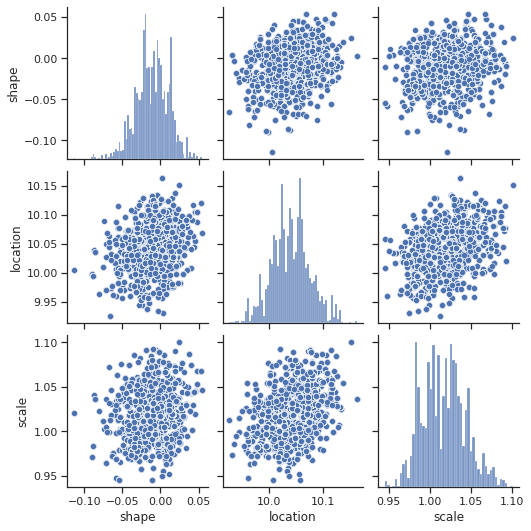

In [132]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape','location','scale']))

In [133]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(-0.01058645649963709, 10.041193031575263, 1.0169952299620015)

In [134]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.02158836865030633, 0.0361448317876368, 0.026207722618903393)

In [152]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1), iterations = 15000, data = sta, acceptance_rule = acceptance)


<ipython-input-123-dd2dc8ea979c>:16: RuntimeWarning:

divide by zero encountered in log



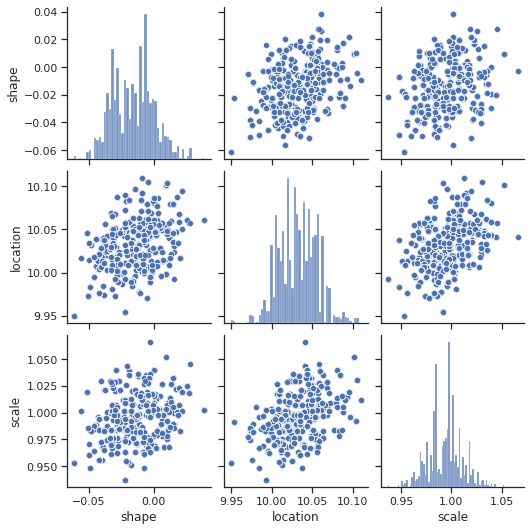

In [153]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape','location','scale']))

In [154]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(-0.015367965697070262, 10.032486757473633, 0.9942194475307264)

In [155]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.015563164278836637, 0.02247225106520663, 0.016651303287647436)

In [156]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1), iterations = 15000, data = non_sta, acceptance_rule = acceptance)


<ipython-input-123-dd2dc8ea979c>:16: RuntimeWarning:

divide by zero encountered in log



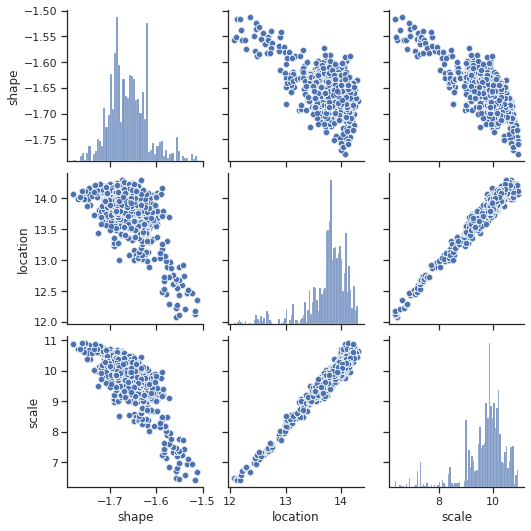

In [157]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape','location','scale']))

In [158]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(-1.6444310087828455, 13.574426938508356, 9.352320922594743)

In [159]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.09220208687541588, 0.8082831000177989, 1.5600136776462954)

In [3]:
# Try to fit a copula
#Source 1:  https://github.com/blent-ai/pycopula
#Source 2:  https://pypi.org/project/copulas/

#from copulas.bivariate import Gumbel
from pycopula.copula import ArchimedeanCopula

<AxesSubplot:xlabel='r', ylabel='d'>

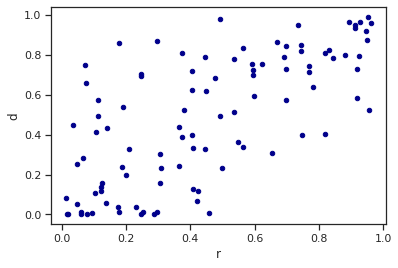

In [180]:
r = stats.genextreme.rvs( size=100, c =0,  loc=10, scale=1)
d = r + np.random.normal(size=100)

data = pd.DataFrame({'r':r, \
                         'd':d})

data_cdf = pd.DataFrame({'r':stats.genextreme.cdf(r,c =0,  loc=10, scale=1), \
                         'd':stats.genextreme.cdf(d,c =0,  loc=10, scale=1)})
data_cdf.plot.scatter(x='r',y ='d', c='DarkBlue')

In [181]:
archimedean = ArchimedeanCopula(family="frank", dim=2)
archimedean.fit(np.array(data_cdf), method="cmle")

(5.6115185946468324, None)

In [11]:
range(len(data_cdf))[1]

1

In [17]:
p=np.zeros(len(data_cdf))
for i in range(len(data_cdf)):
     p[i] =  archimedean.pdf(np.array(data_cdf)[i,:])

In [241]:
def cdf_2d(copula, step=40):
	u = np.linspace(1e-4, 1.-1e-4, num=step)
	v = np.linspace(1e-4, 1.-1e-4, num=step)
	C = []

	for i in range(len(u)):
		row = []
		for j in range(len(v)):
			row.append(copula.cdf([ u[i], v[j] ]))
		C.append(row)

	return u, v, np.asarray(C)

In [242]:
def pdf_2d(copula, step=40, zclip=None):
	if zclip == None:
		zclip = 5
	if zclip <= 0:
		raise ValueError("The z-clip value must be strictly greater than 0.")
	u = np.linspace(1e-4, 1.-1e-4, num=step)
	v = np.linspace(1e-4, 1.-1e-4, num=step)
	C = []

	for i in range(len(u)):
		row = []
		for j in range(len(v)):
			if zclip != None:
				row.append(min(copula.pdf([ u[i], v[j] ]), zclip))
			else:
				row.append(copula.pdf([ u[i], v[j] ]))
		C.append(row)

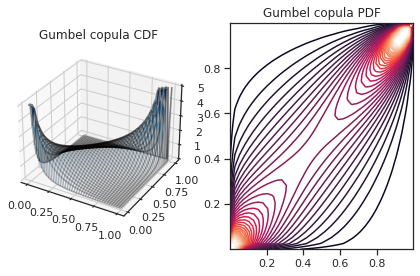

In [258]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pycopula.visualization import pdf_2d, cdf_2d


# Visualization of CDF and PDF
u, v, C = cdf_2d(archimedean)
#u, v, c = pdf_2d(archimedean)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d', title="Gumbel copula CDF")
X, Y = np.meshgrid(u, v)

ax.set_zlim(0, 5)
ax.plot_surface(X, Y, c, cmap=cm.Blues)
ax.plot_wireframe(X, Y, c, color='black', alpha=0.3)

ax = fig.add_subplot(122, title="Gumbel copula PDF")
ax.contour(X, Y, c, levels = np.arange(0,5,0.15))
fig.tight_layout()

plt.show()

In [348]:
# write the code for inference using the Bayesian 'machinery'

#define prior
def log_prior(par):
    par = par[4]
    if(par >= -1 and par <= 1 ):
        return 0
    else:
        return -np.inf

#define likelihood function

def log_lik_gev(par,data):

    p1 = np.sum(np.log(stats.genextreme(0,par[0],par[1]).pdf([data['r']])))
    p2 = np.sum(np.log(stats.genextreme(0,par[2],par[3]).pdf([data['d']])))
    
    data_cdf = pd.DataFrame({'r':stats.genextreme.cdf(data['r'],c =0,  loc=10, scale=1), \
                         'd':stats.genextreme.cdf(data['d'],c =0,  loc=10, scale=1)})
    p3 = np.zeros(len(data_cdf))
    for i in range(len(data_cdf)):
        p3[i] =  archimedean.pdf_param(np.array(data_cdf)[i,:], theta = par[4])
    p3 = np.sum(np.log(p3))
    return p1 + p2 + p3

#define posterior
def log_post(par, data):
    if (log_prior(par)==-np.inf):
        lp = log_prior(par)
    else: 
        lp = log_lik_gev(par,data)
    return lp    


In [349]:
log_post((10,1,10,1,5), data)

-inf

In [36]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1,0,10,1,5), iterations = 15000, data = data, acceptance_rule = acceptance)


<ipython-input-25-bdda50fcd5f4>:16: RuntimeWarning:

divide by zero encountered in log

<ipython-input-25-bdda50fcd5f4>:15: RuntimeWarning:

divide by zero encountered in log



In [37]:
shape, loc, scale = accepted[:,0].mean(), accepted[:,1].mean(), accepted[:,2].mean()
shape, loc, scale # infered parameter 

(-0.011475290680037798, 10.121216884309819, 0.9931548889473033)

In [38]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.08295219160860745, 0.11623347517483881, 0.08683074663953527)

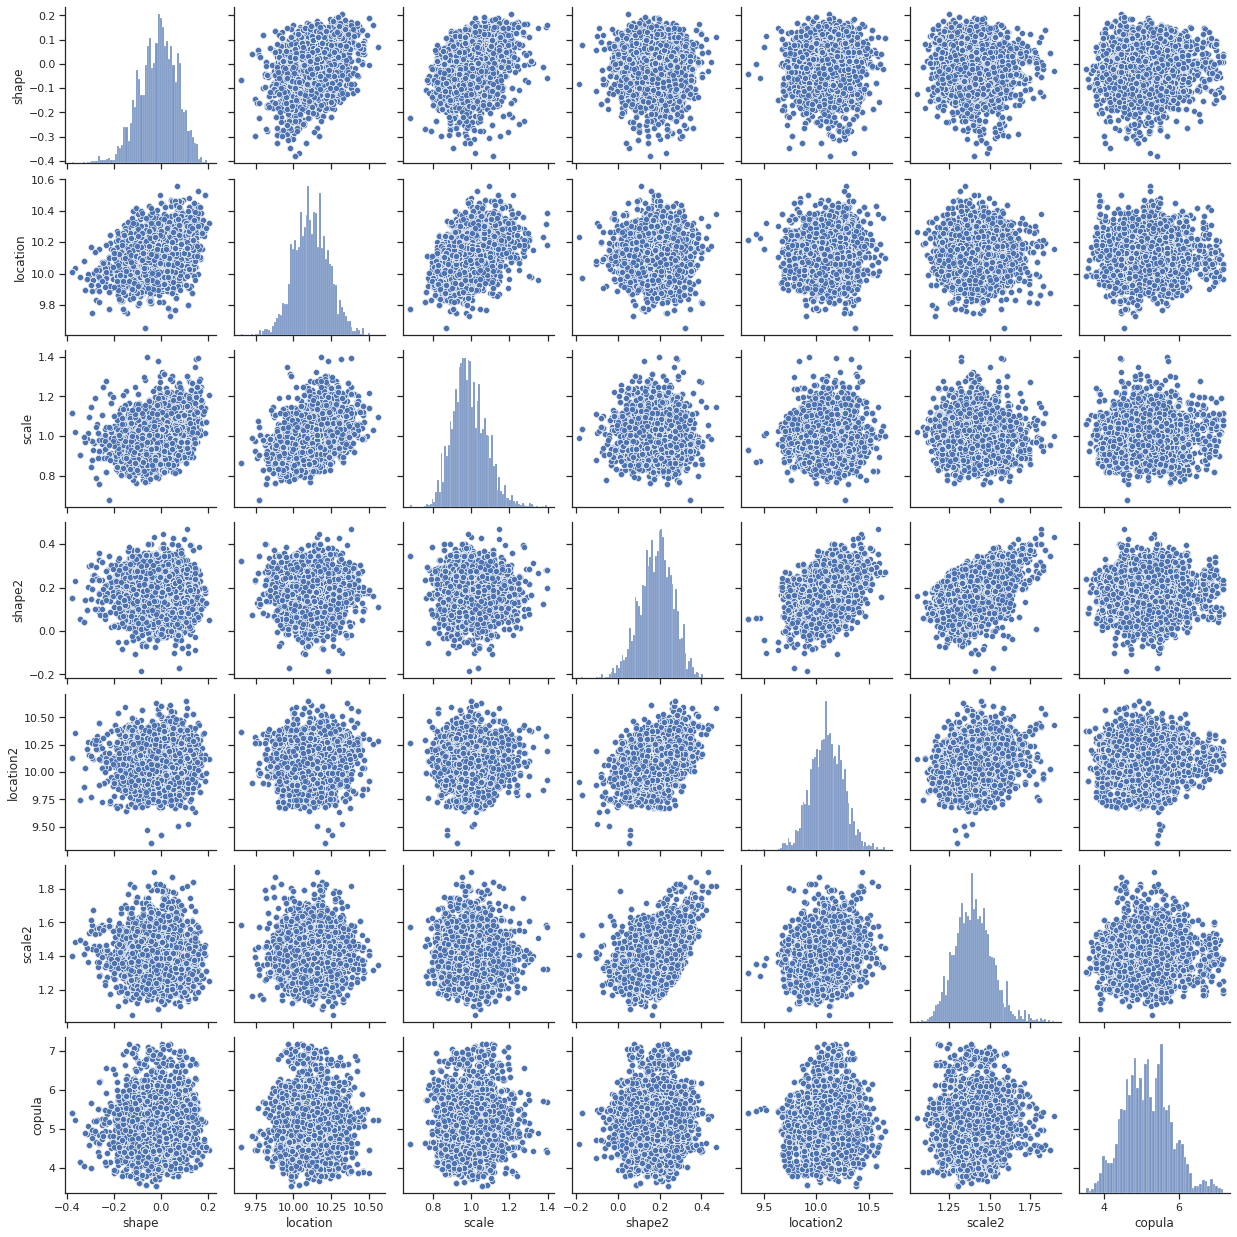

In [40]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape1','location1','scale1','shape2','location2','scale2','copula']))

In [51]:
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = (0,10,1,0,10,1,5), iterations = 15000, data = data.iloc[1:20], acceptance_rule = acceptance)


<ipython-input-25-bdda50fcd5f4>:16: RuntimeWarning:

divide by zero encountered in log

<ipython-input-25-bdda50fcd5f4>:15: RuntimeWarning:

divide by zero encountered in log



In [52]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.28858837701413226, 0.2871580192278146, 0.23856633991103826)

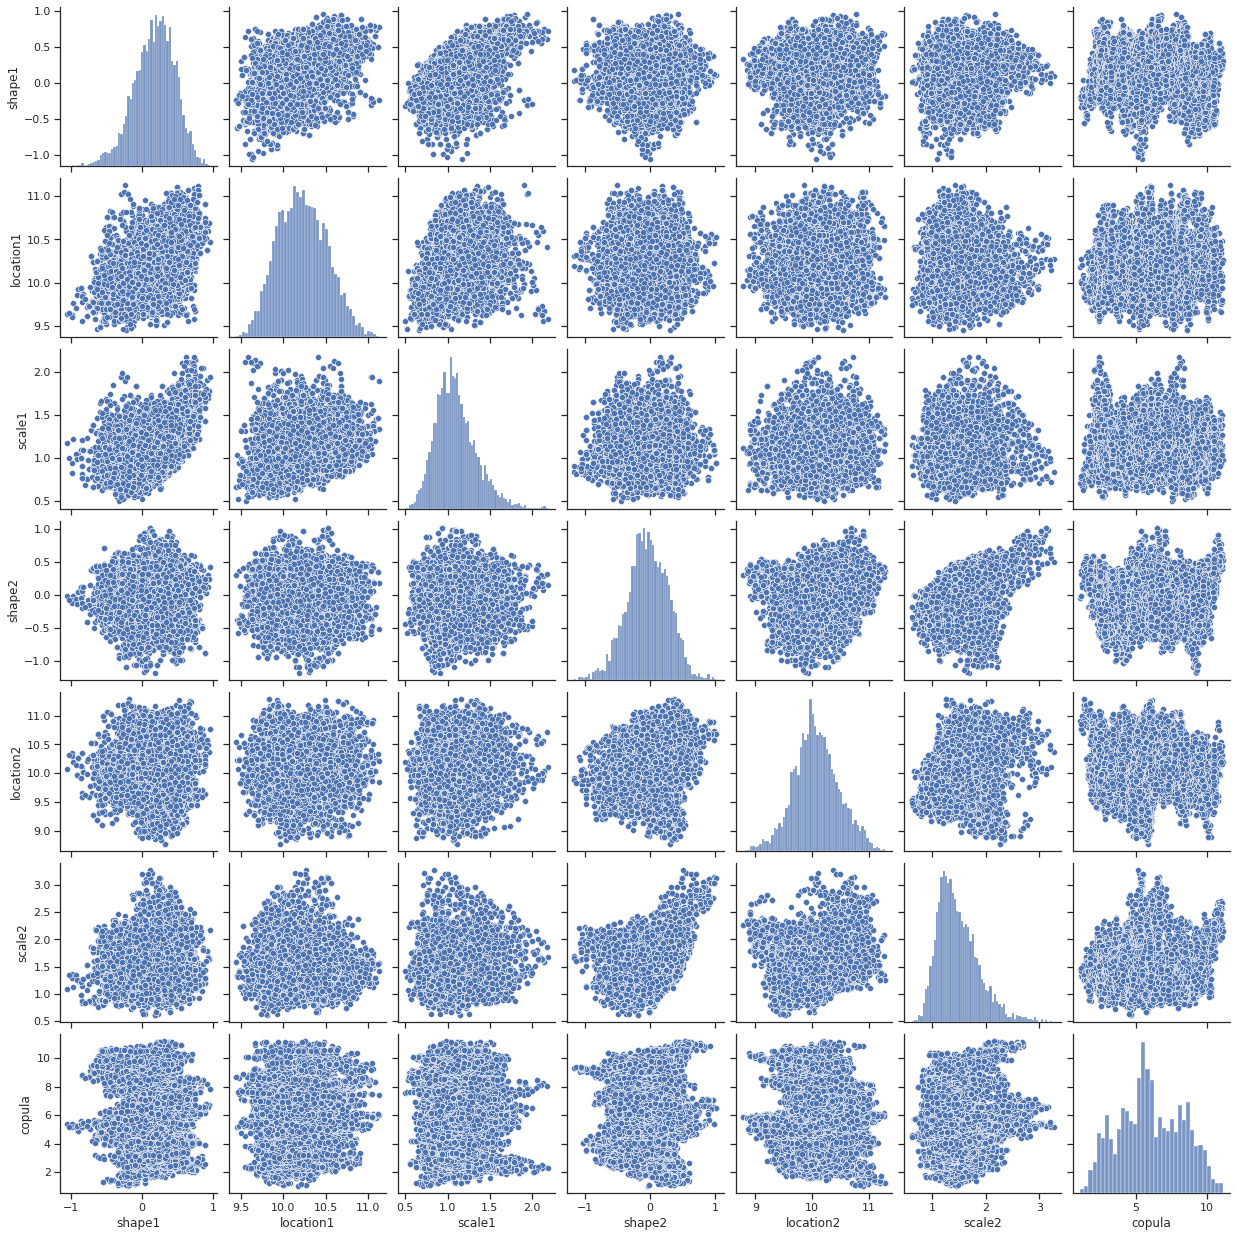

In [53]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['shape1','location1','scale1','shape2','location2','scale2','copula']))

In [79]:
# real case study
rain = np.array(get_data(4,['Precipitation']).loc['1975-1-1':'2015-1-1']['CS2MET_Precipitation'])
discharge = np.asarray(get_data(4,['Discharge']).loc['1975-1-1':'2015-1-1']['GSLOOK_Discharge'])

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


In [67]:
from scipy.signal import argrelextrema   # get locat extrema

In [85]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [133]:
rain_ma = moving_average(rain, 30)
discharge_ma = moving_average(discharge, 30)

In [112]:
rain_peak = rain_ma[argrelextrema(rain_ma, np.greater)]
discharge_peak = discharge_ma[argrelextrema(discharge_ma, np.greater)]

In [100]:
rain_peak.shape

(1053,)

In [101]:
discharge_peak.shape

(461,)

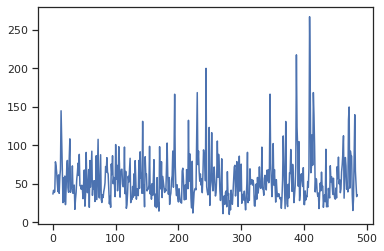

In [159]:
plt.plot(rain_monthly_max)

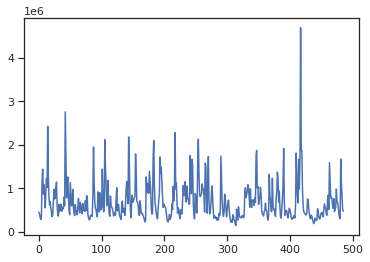

In [160]:
plt.plot(discharge_monthly_max)

In [156]:
rain_monthly = rain[0:14580].reshape(30,486)
discharge_monthly = discharge[0:14580].reshape(30,486)

In [158]:
rain_monthly_max = np.amax(rain_monthly, axis=0)
discharge_monthly_max = np.amax(discharge_monthly, axis=0)

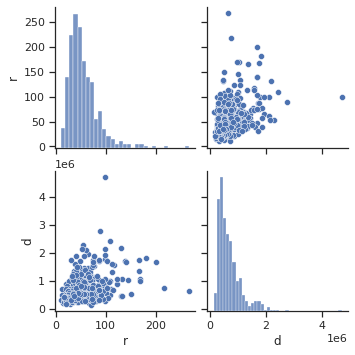

In [163]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max}))

In [165]:
HJA = pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max})

In [167]:
stats.genextreme.fit(rain_monthly_max)

(-0.14469350170243728, 41.20848977710314, 18.88853885550551)

In [168]:
stats.genextreme.fit(discharge_monthly_max)

(-0.3073126563299831, 481049.1128333921, 226188.34890978452)

<AxesSubplot:xlabel='r', ylabel='d'>

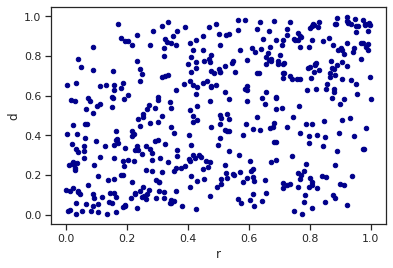

In [171]:
HJA = pd.DataFrame({'r':rain_monthly_max, 'd':discharge_monthly_max})

HJA_cdf = pd.DataFrame({'r':stats.genextreme.cdf(rain_monthly_max,c =-0.144,  loc=41.2, scale=18.8), \
                         'd':stats.genextreme.cdf(discharge_monthly_max,c =-0.30,  loc=481049, scale=226188)})
HJA_cdf.plot.scatter(x='r',y ='d', c='DarkBlue')

In [337]:
archimedean = ArchimedeanCopula(family="amh", dim=2)
archimedean.fit(np.array(HJA_cdf), method="cmle")

(0.7568462477488112, None)

In [363]:
transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),[10,10,25000,25000,1])
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = ( 41.2, 18.80, 481049, 226188, 0.75), iterations = 15000, data = HJA.loc[0:200], acceptance_rule = acceptance)


In [364]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(1.335787032285311, 1.0473202406538746, 24478.7223170041)

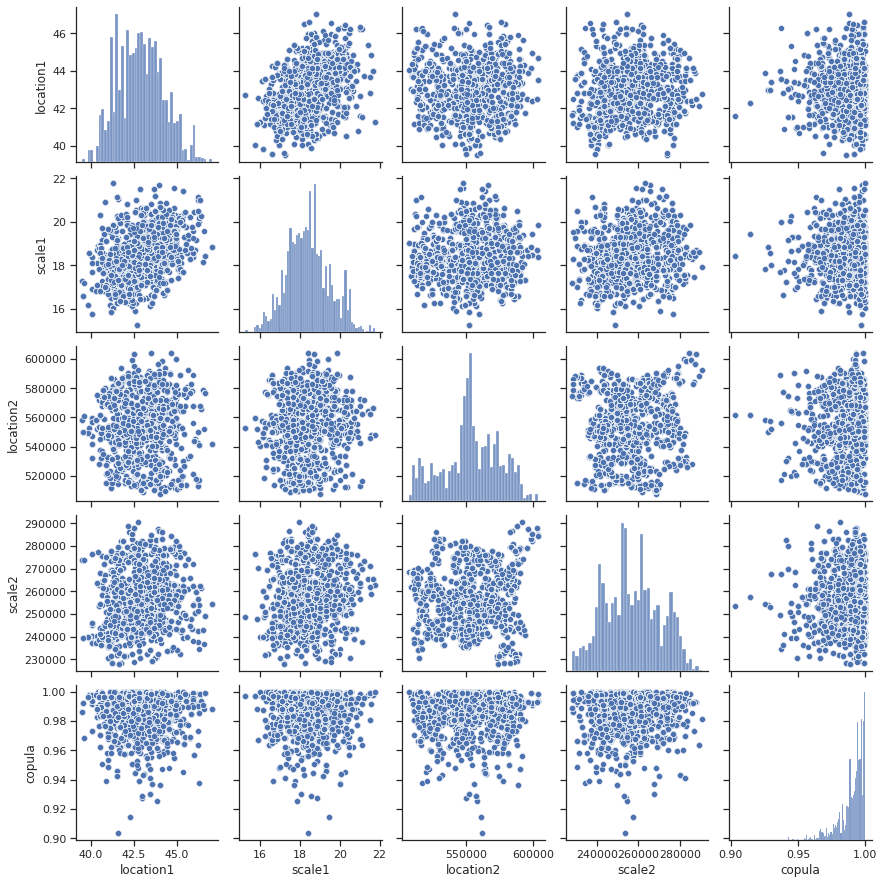

In [365]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))

In [372]:
transition_model = lambda x: x+np.multiply(np.random.normal(0,0.1,len(x)),[10,10,25000,25000,1])
accepted, rejected = metropolis_hastings(likelihood_computer = log_post, transition_model = transition_model,param_init = ( 41.2, 18.80, 481049, 226188, 0.75), iterations = 15000, data = HJA, acceptance_rule = acceptance)


In [373]:
spread = accepted[:,0].std(), accepted[:,1].std(), accepted[:,2].std()
spread

(0.9988322321875944, 0.7554569986797466, 16532.680906277998)

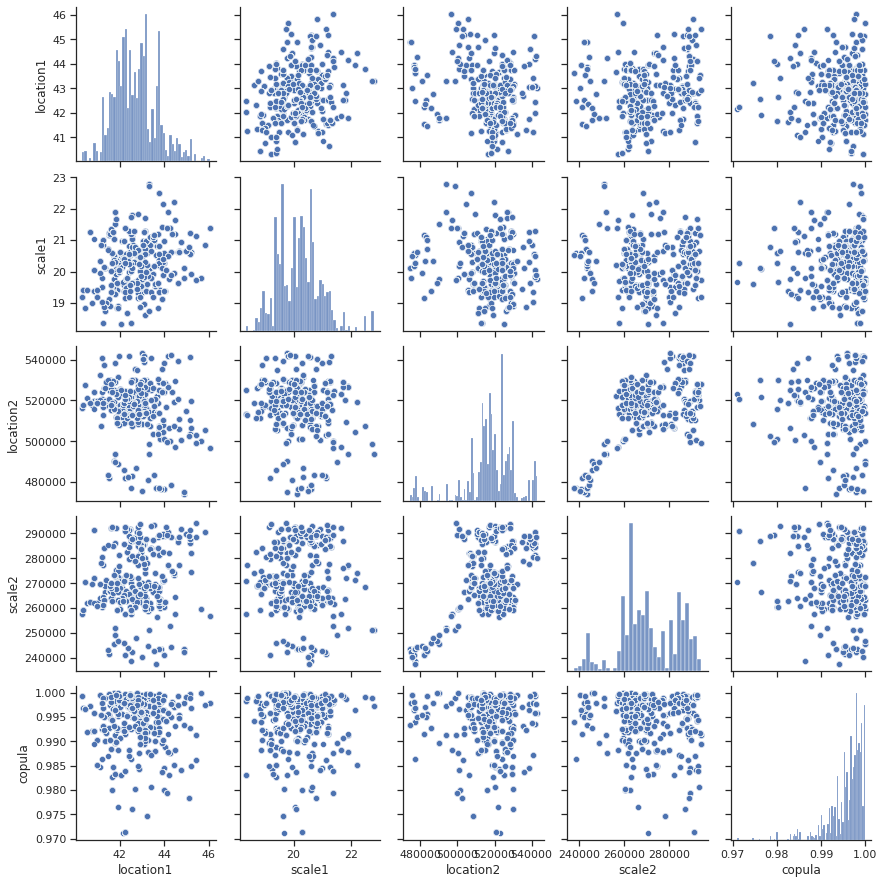

In [374]:
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(accepted[1000:15000,:], columns = ['location1','scale1','location2','scale2','copula']))